In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_submission = pd.read_csv("./sample_submission.csv")
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Latihan: Data Cleaning dan Transformation

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analisis Deskriptif

In [7]:
# menampilkan statistik deskriptif
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## Mencari Nilai yang Hilang

In [8]:
# memeriksa jumlah nilai yang hilang di setiap kolom
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Mengatasi Missing Value

Pertama-tama, mari kita pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.

In [9]:
less = missing_value[missing_value < 1000].index
over = missing_value[missing_value >= 1000].index

In [10]:
less

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [11]:
over

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Mari kita mulai dengan mengatasi missing value untuk tipe data numerik.

In [12]:
numeric_feature = train[less].select_dtypes(include=["number"]).columns
train[numeric_feature] = train[numeric_feature].fillna(train[numeric_feature].median())

Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.

1. Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.

2. Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom. kenapa median ? karna median lebih tahan banting ama outliers

Selanjutnya, kita perlu menangani permasalahan yang serupa pada data yang bertipe object atau string. Sedikit berbeda dengan kasus data numerik, pada kasus ini kita tidak bisa menggunakan median, mean, atau fungsi agregasi lainnya. Biasanya ada dua cara yang sering dilakukan untuk mengatasi permasalahan missing value pada data kategori.

1. Mengisi Missing Value dengan Modus (Nilai yang Paling Sering Muncul): pendekatan ini cukup umum karena nilai modus sering kali merupakan representasi yang baik untuk data yang hilang dalam konteks kategorikal.
2. Mengisi dengan Kategori Baru (Misalnya "Unknown" atau "Missing"): ini adalah cara lain untuk menangani missing value dengan menandai data yang hilang sebagai kategori baru.

In [13]:
kategorical_feature = train[less].select_dtypes(include=["object"]).columns

for column in kategorical_feature:
    train[column] = train[column].fillna(train[column].mode()[0])

Kode di atas akan melakukan pengulangan pada setiap kolom yang berisi data kategori dalam DataFrame train. Selanjutnya, setiap kolom kategori akan melakukan proses pergantian untuk semua nilai yang hilang (NaN) dengan nilai modus dari kolom tersebut. Hasil akhirnya adalah semua kolom kategori dalam DataFrame train tidak lagi memiliki nilai yang hilang (NaN) karena semua NaN telah diisi dengan nilai modus dari kolom masing-masing.

```python
train[column].fillna(train[column].mode()[0])
```

Artinya:

Mengisi nilai NaN di kolom tertentu dengan modus (nilai yang paling sering muncul) pada kolom tersebut.

Kalau ada lebih dari satu modus, hanya dipakai modus pertama ([0]).


#### Menghapus Kolom dengan Banyak Nilai yang Hilang:jika ada kolom dengan terlalu banyak nilai yang hilang, kita bisa mempertimbangkan untuk menghapusnya (pada kasus ini kita mengambil batasan 75%). Untuk mengatasi kasus ini sangatlah mudah, pertama Anda perlu mengambil index atau nama kolom dari fitur yang memiliki missing value lebih dari batasan yang sudah ditentukan (Anda dapat lihat kode ketika memisahkan kolom di atas). Kemudian hal yang perlu dilakukan adalah menghapus kolom tersebut sesuai dengan nama fitur yang sudah ditentukan sebelumnya

In [14]:
df = train.drop(columns=over)

In [15]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

### Mengatasi Outliers

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

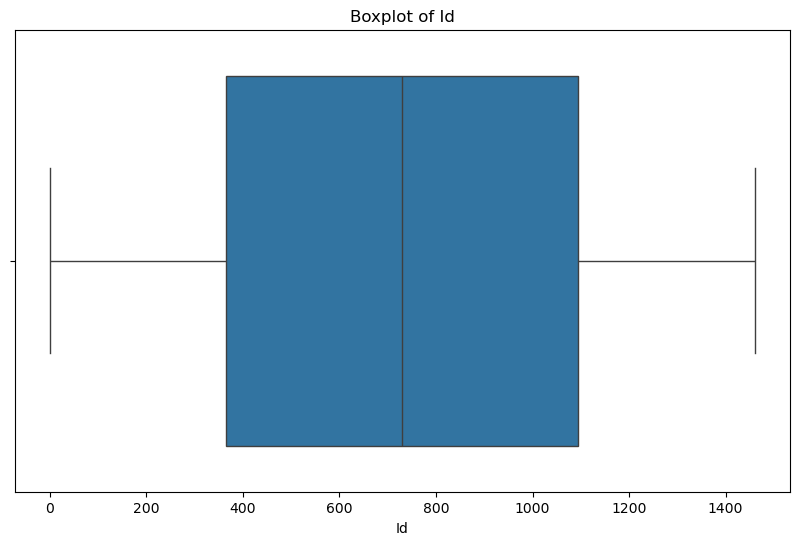

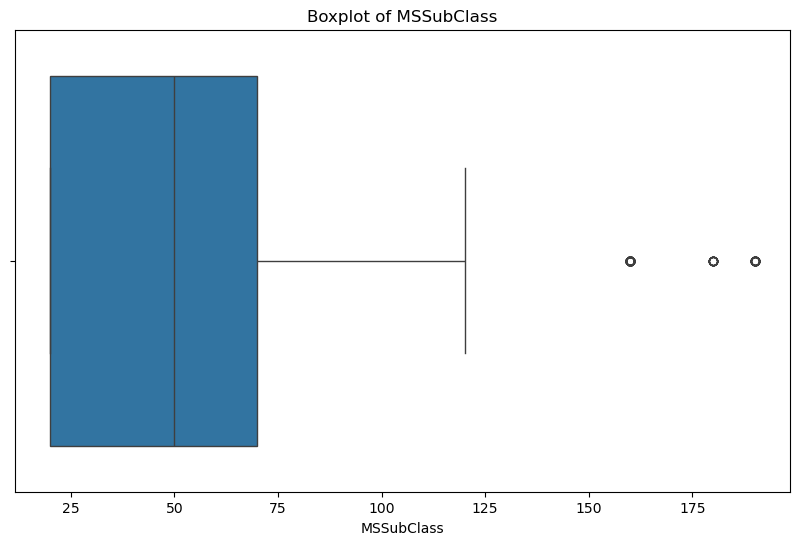

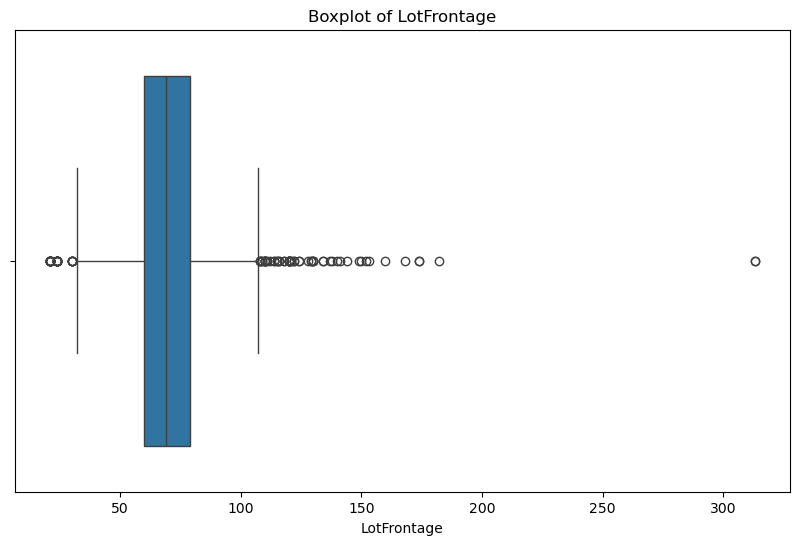

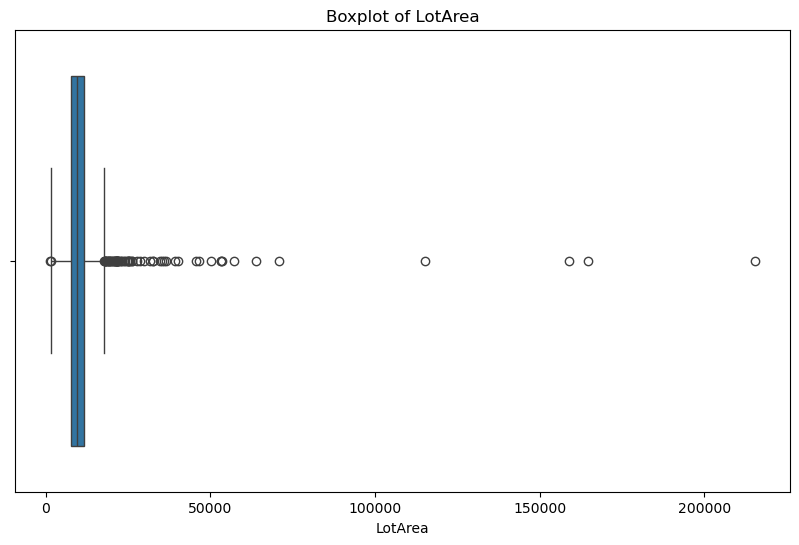

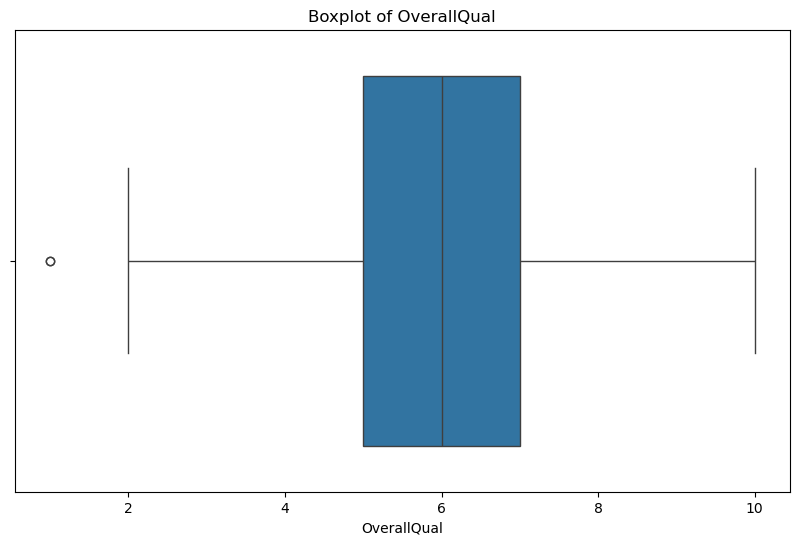

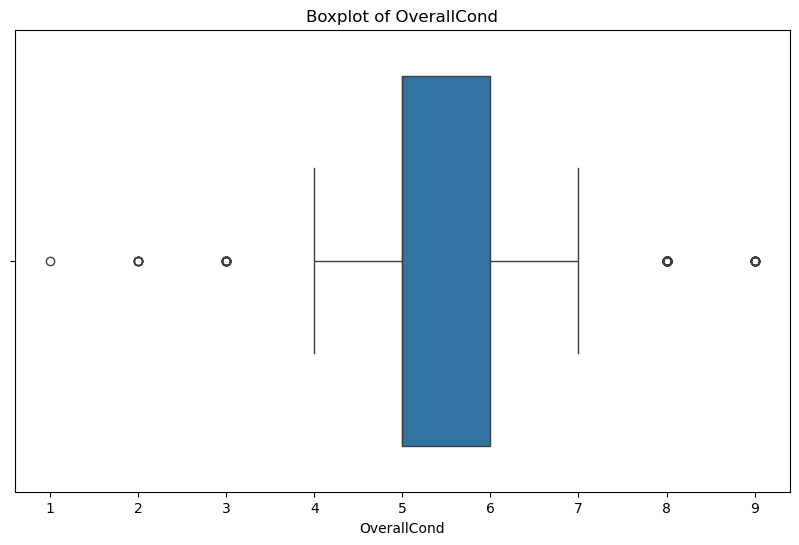

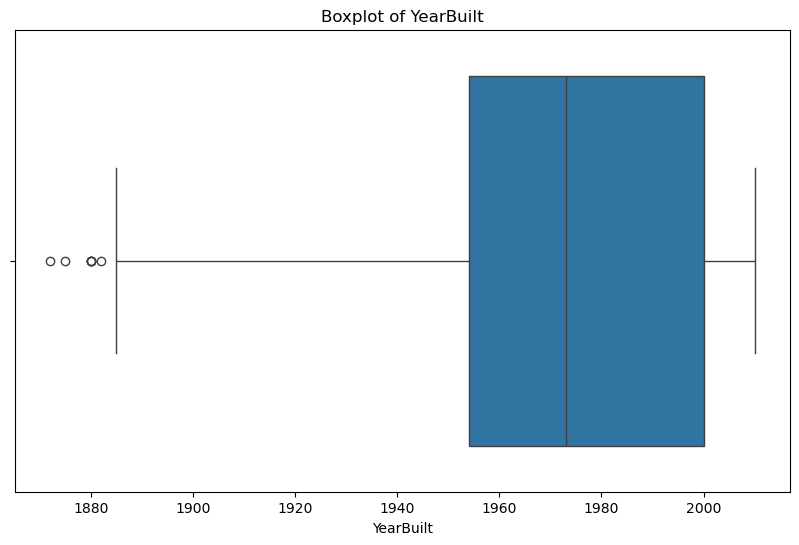

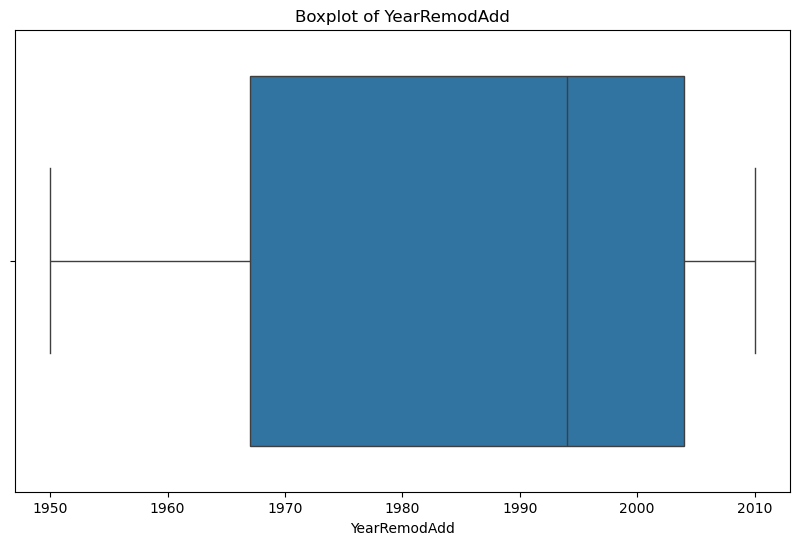

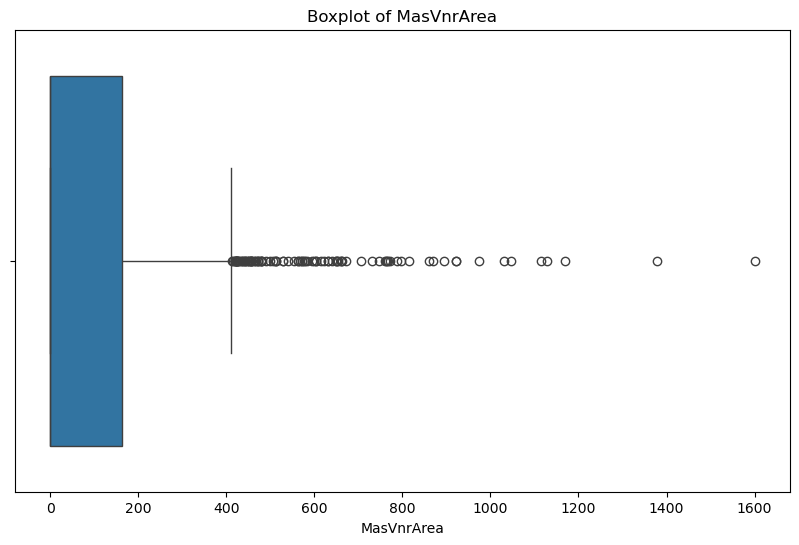

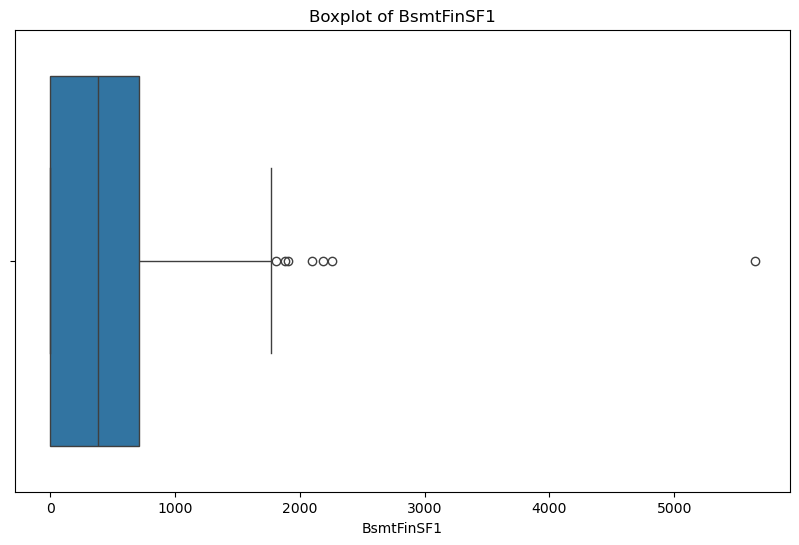

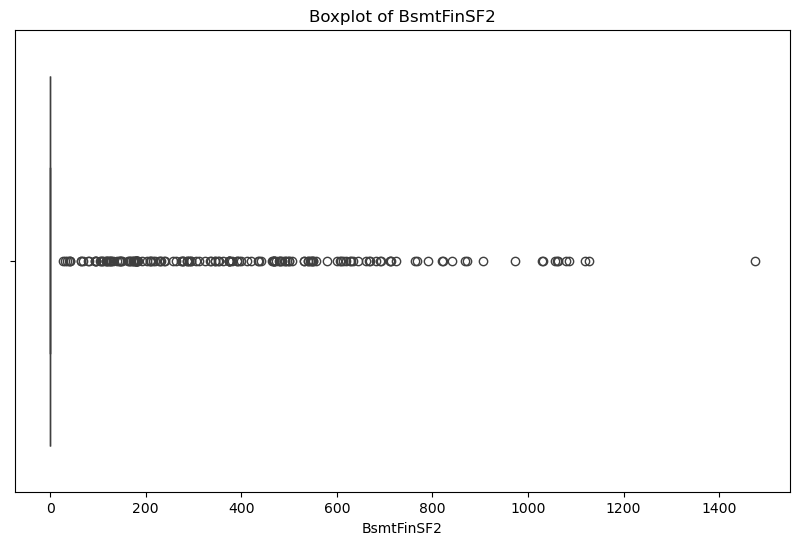

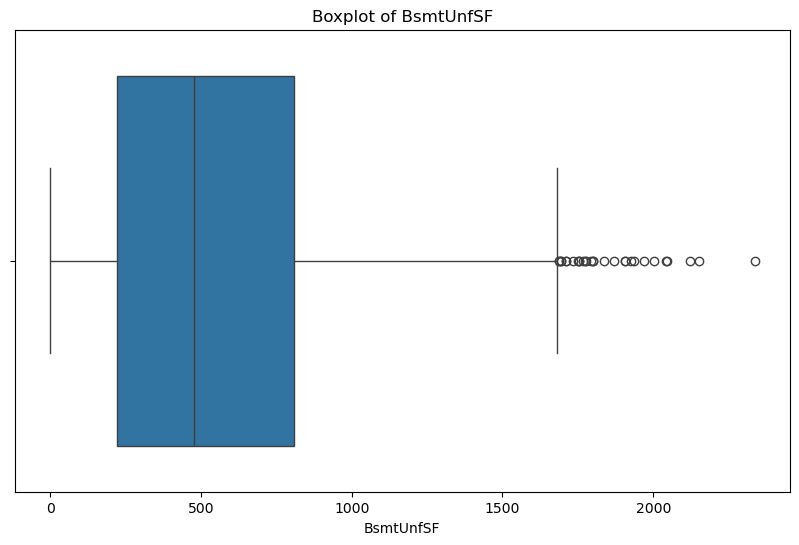

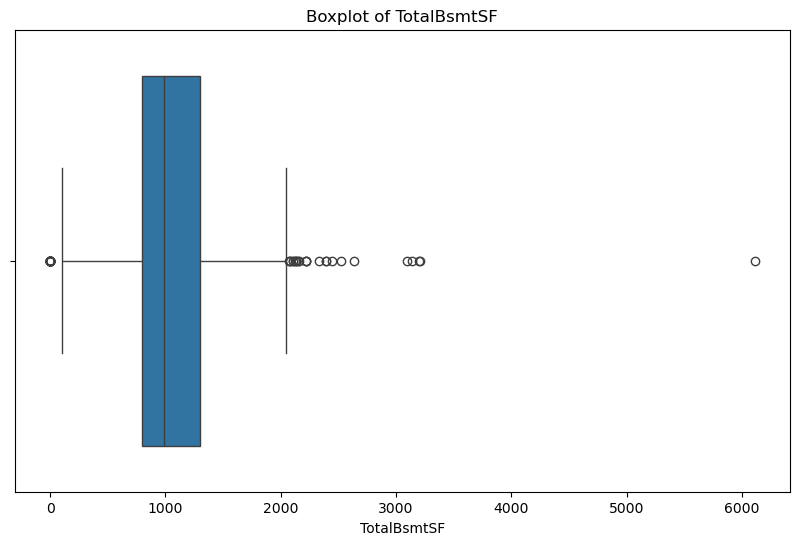

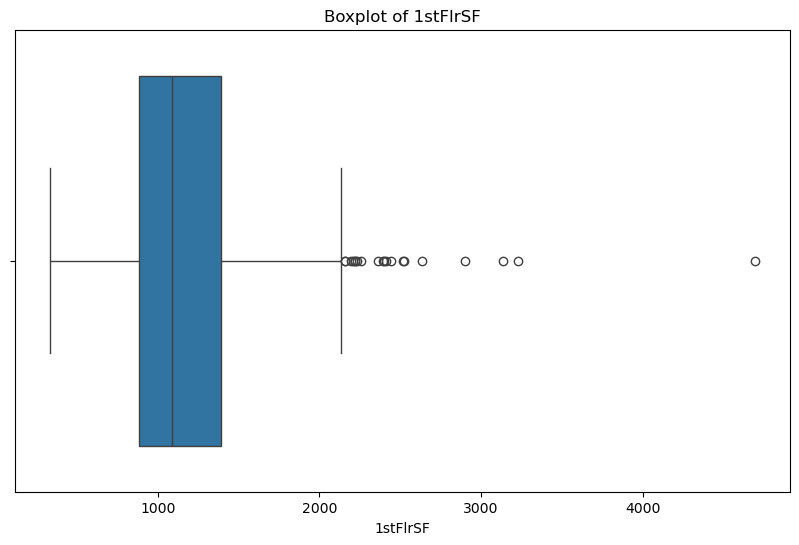

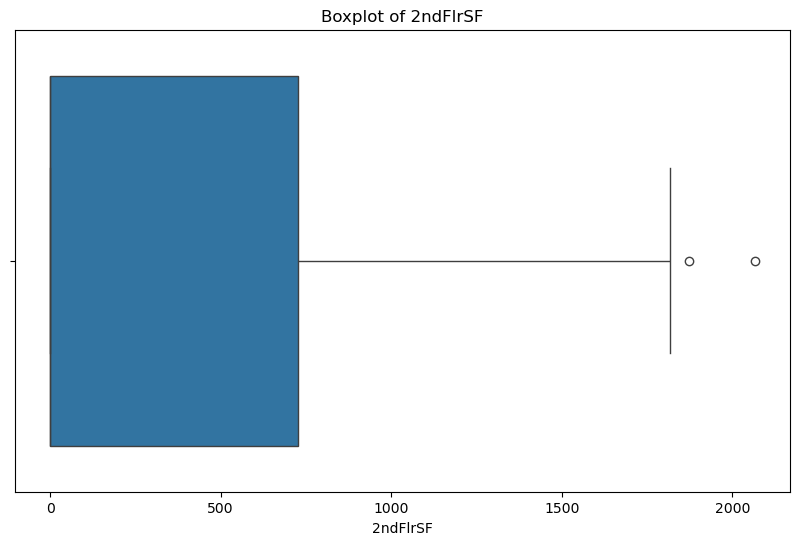

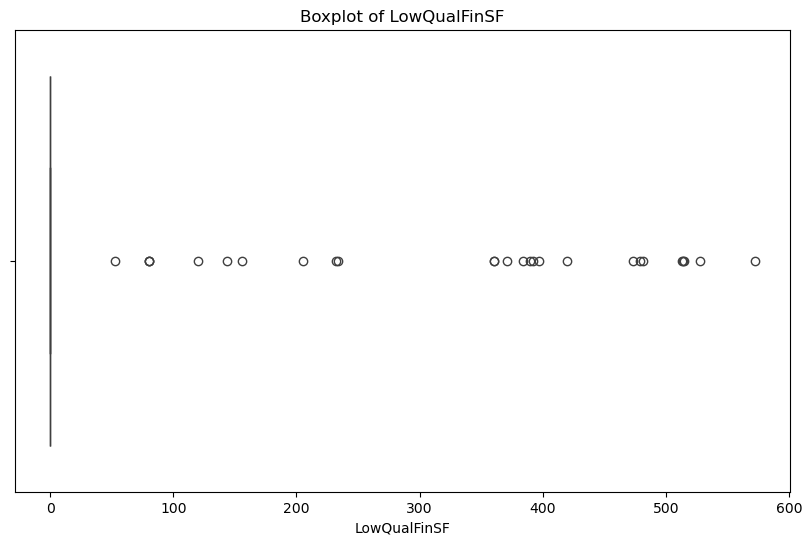

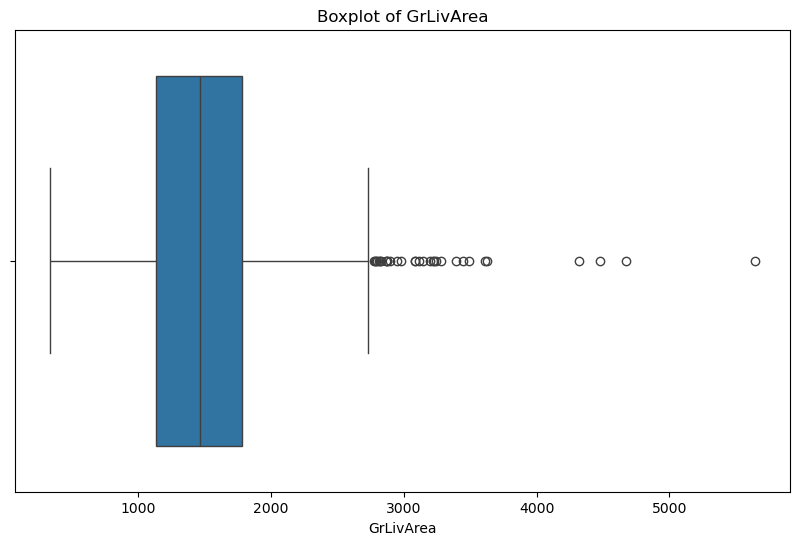

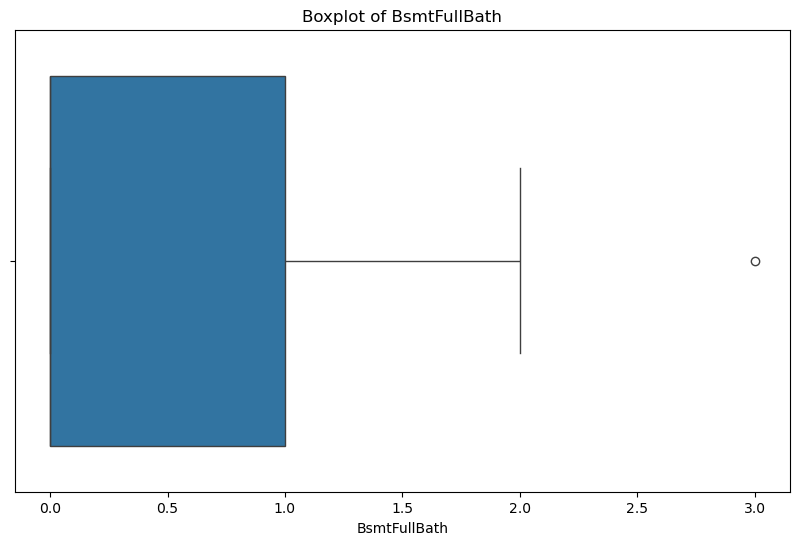

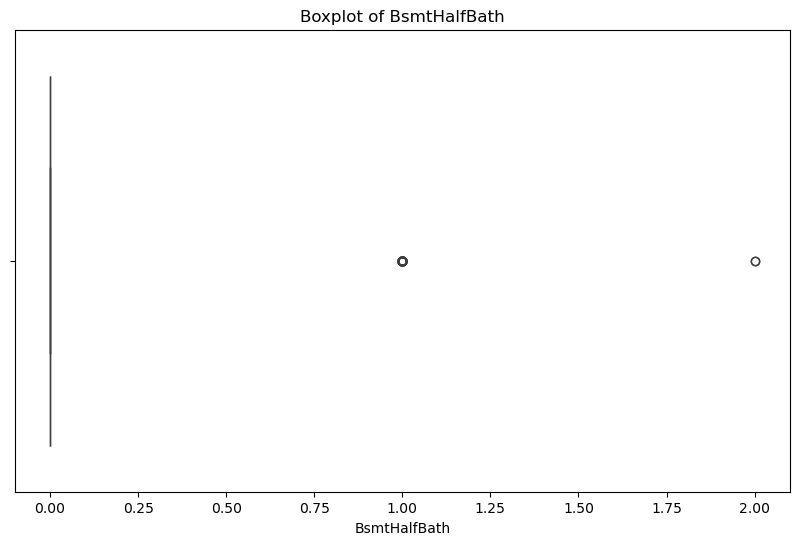

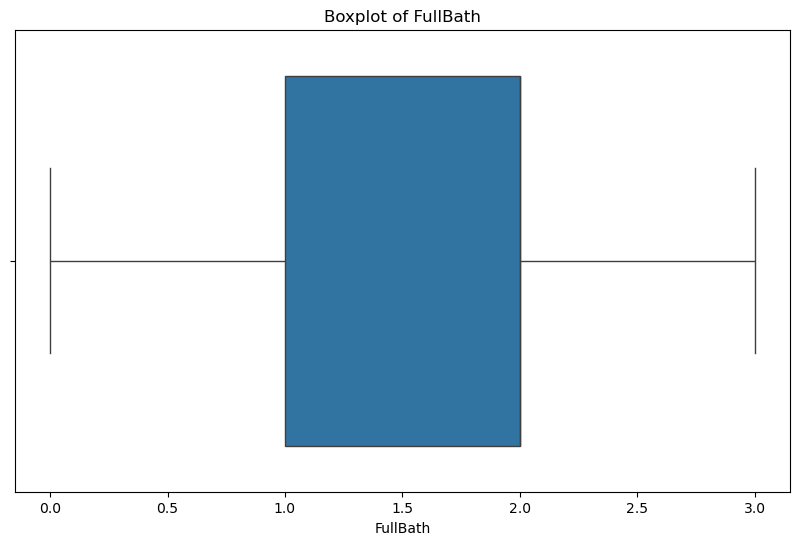

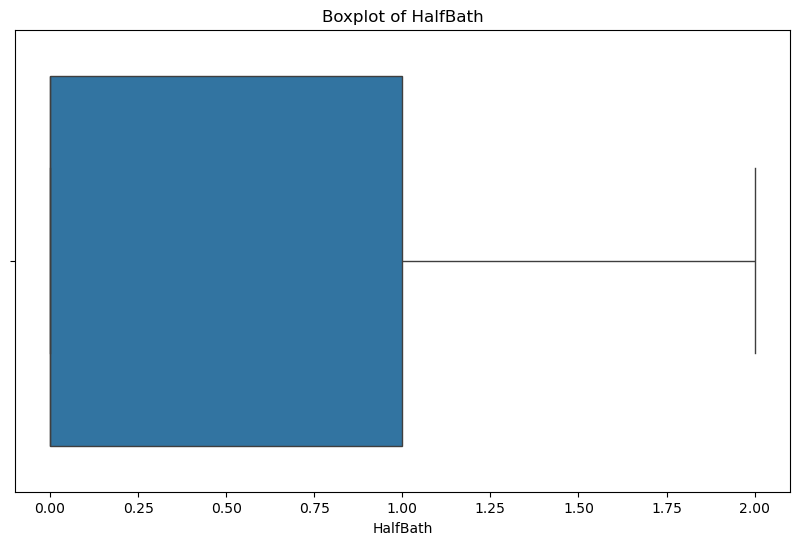

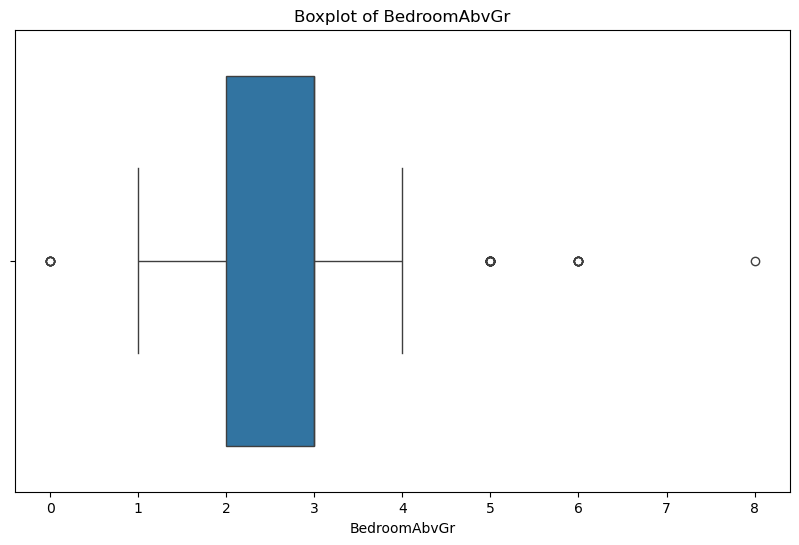

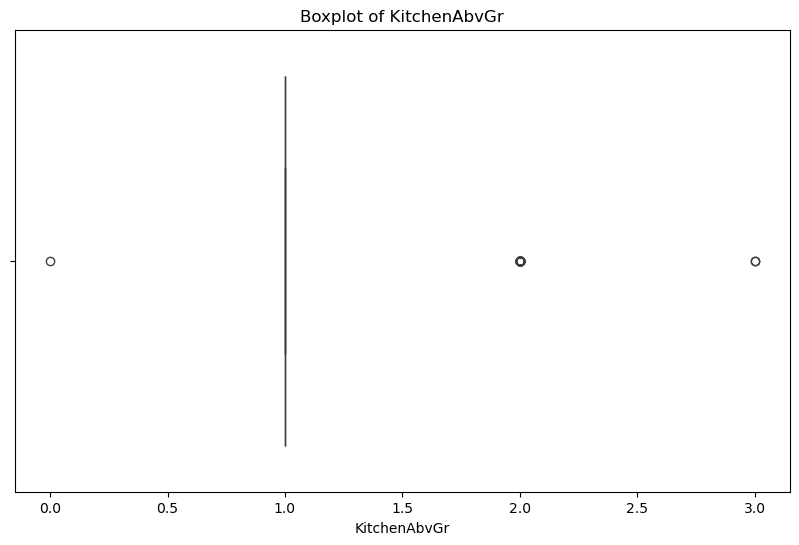

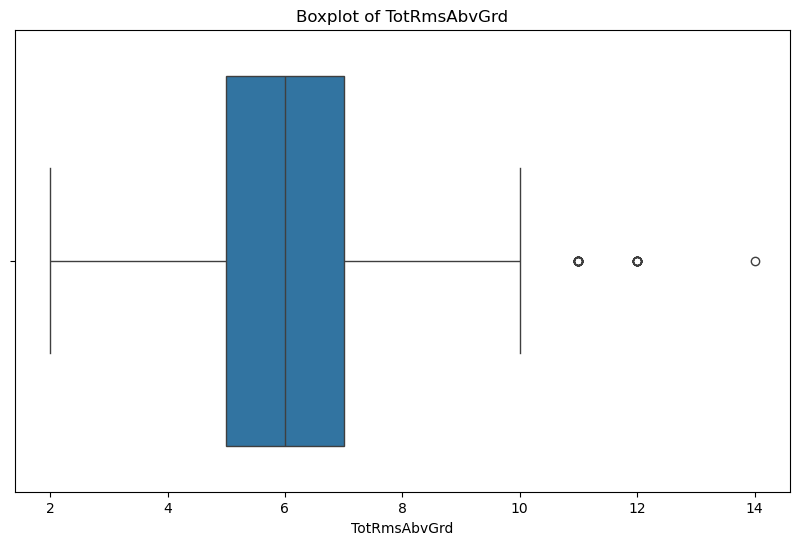

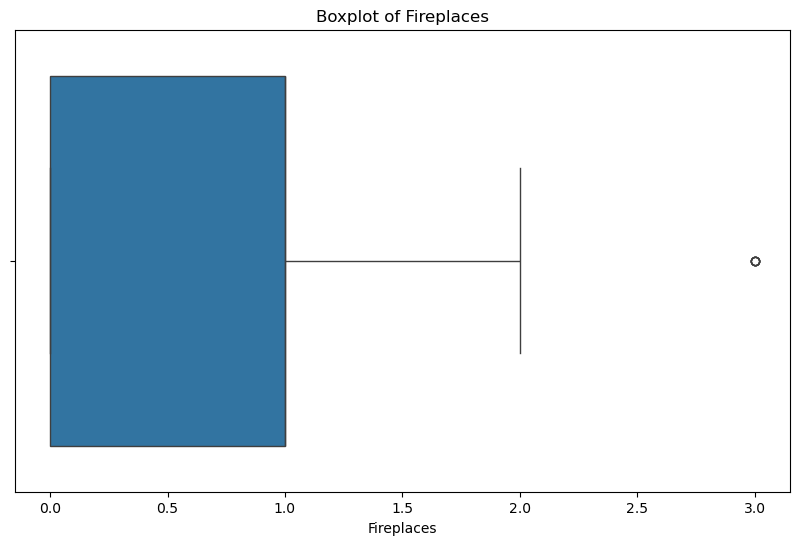

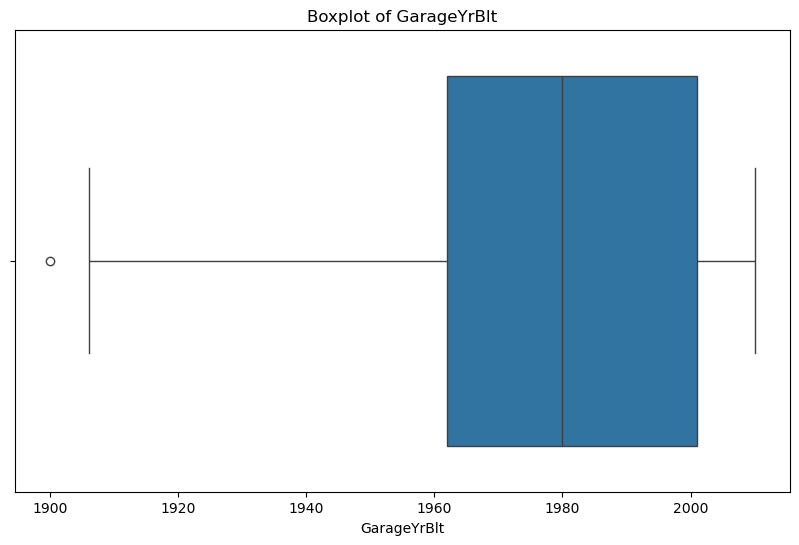

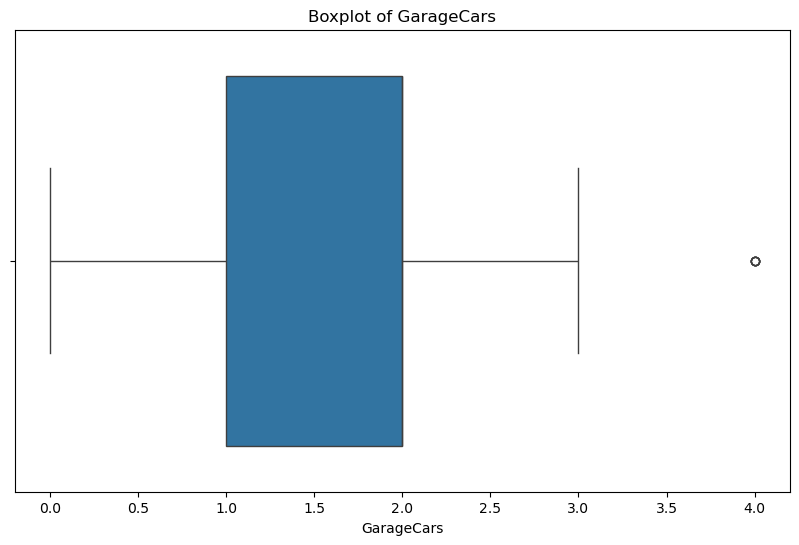

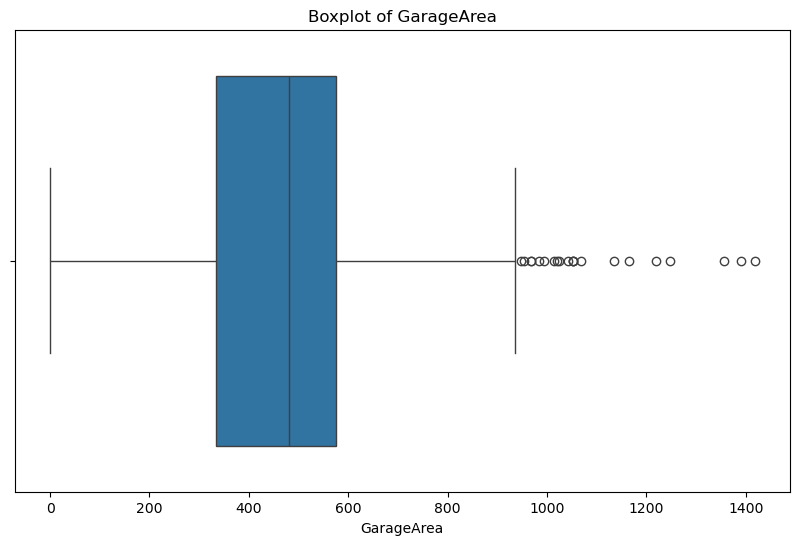

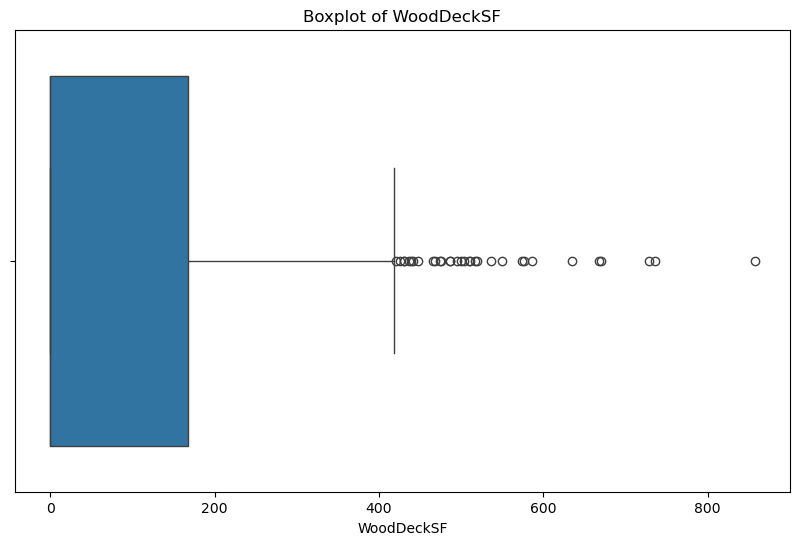

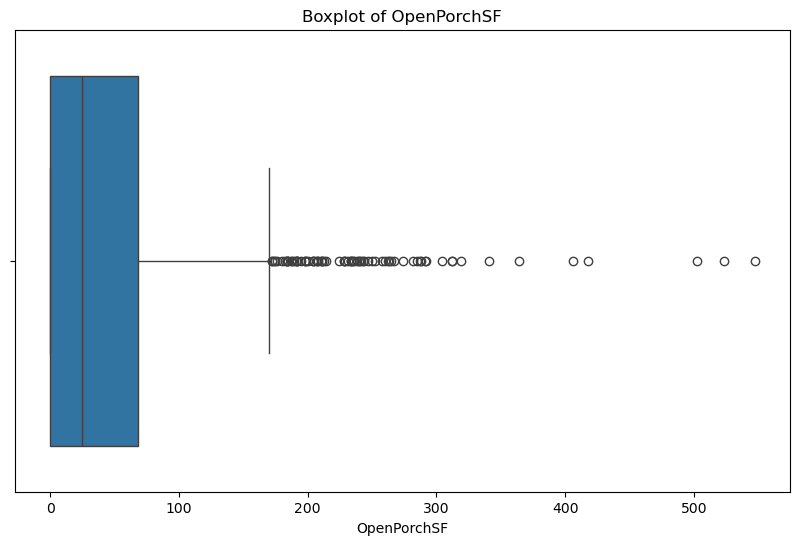

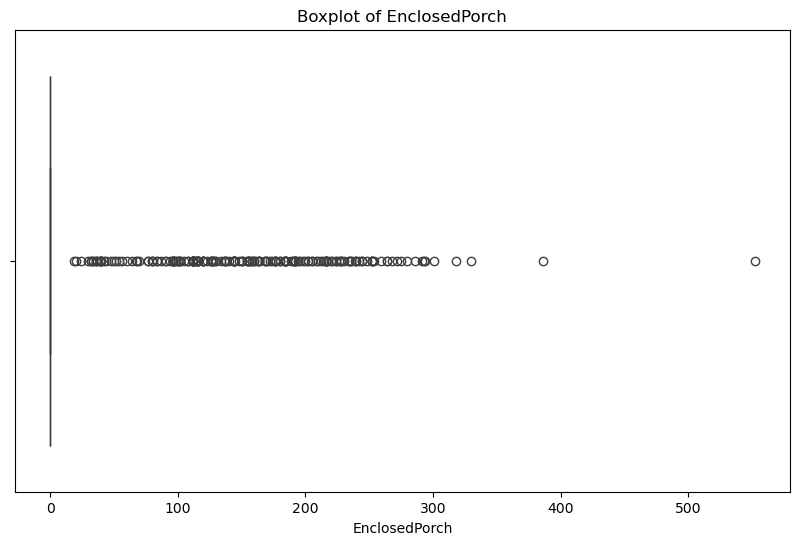

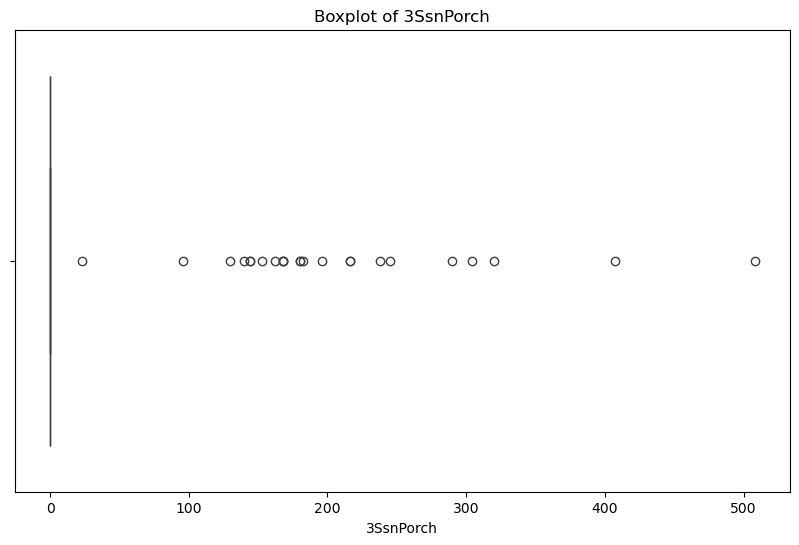

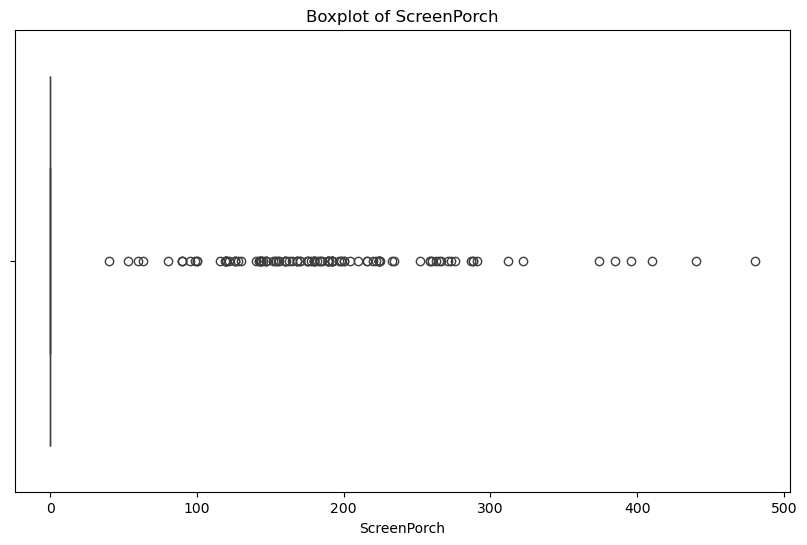

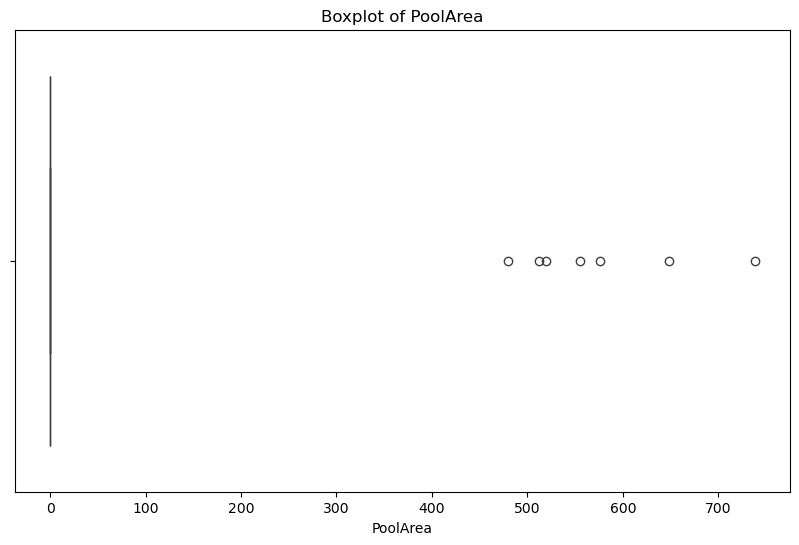

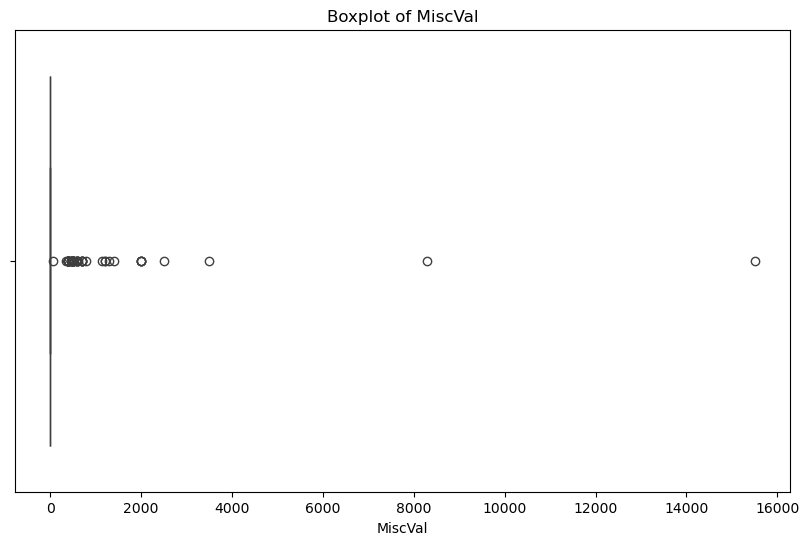

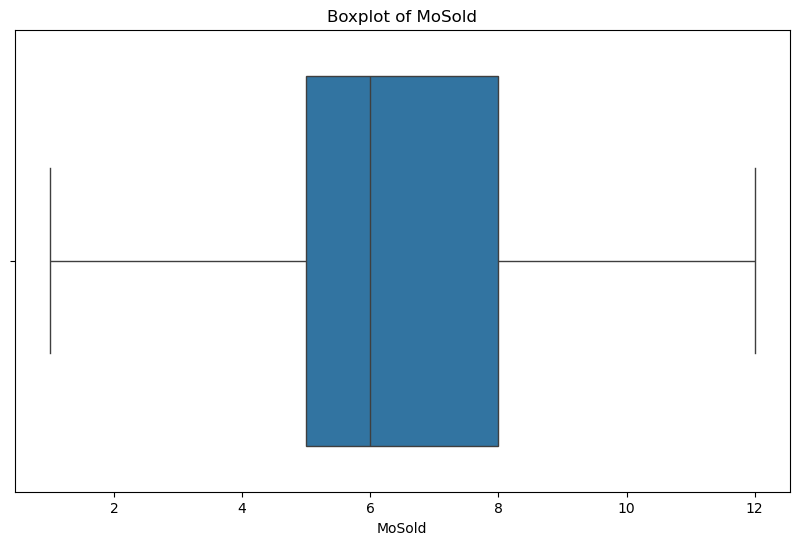

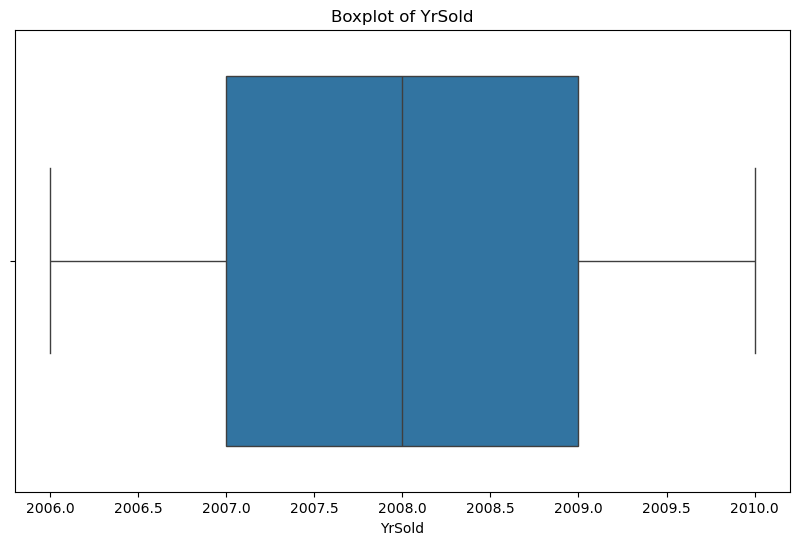

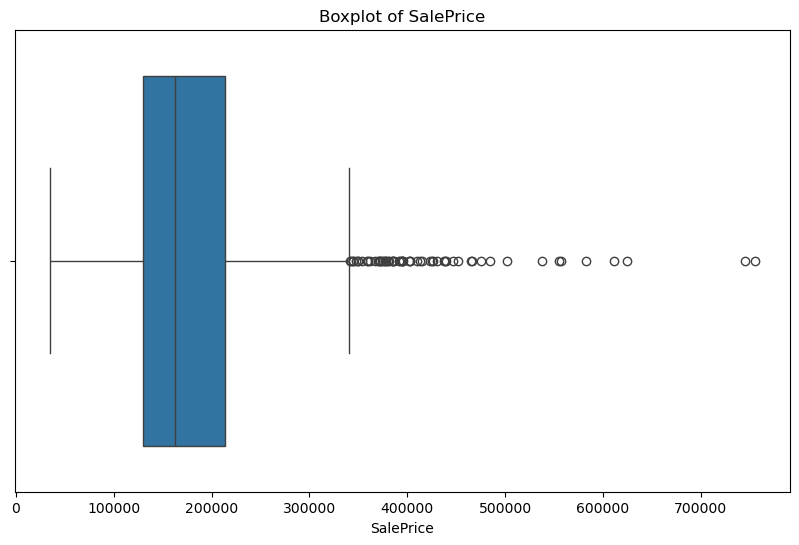

In [16]:
for feature in numeric_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x=df[feature]
    )
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [17]:
# contoh sederhana untuk mengedintifikasi outliers menggunakan IQR
Q1 = df[numeric_feature].quantile(0.25)
Q3 = df[numeric_feature].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# solusi kalau mao mengganti outlier per kolom
# for col in numeric_feature:
#     Q1 = df[numeric_feature].quantile(0.25)
#     Q3 = df[numeric_feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     df = df[(df[numeric_feature] >= lower_bound) & (df[numeric_feature] <= upper_bound)]


In [19]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_feature] <= (Q1 - 1.5 * IQR)) | (df[numeric_feature] >= (Q3 + 1.5 * IQR))).all(axis=1)

df_filtered_numeric = df.loc[condition, numeric_feature]

# Menggabungkan kembali dengan kolom kategorikal

categorical_feature = df.select_dtypes(include=["object"]).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_feature]], axis=1)

In [20]:
# fungsi di atas itu menghapus outliers, sebenernya bisa pakai opsi lain kek mengganti dengan media or nilai batas terdekat
# ```
# median = df['column_name'].median()
# df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)
# ```


# ```
# # Mengganti outlier dengan nilai batas terdekat
# df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)
# ```

### Normalisasi dan Standardisasi Data

ane coba standarscaler ama powertransformer
ane pilih dulu yang powertransformer aja karna bisa mendekati distribusi normal

In [21]:
# from sklearn.preprocessing import StandardScaler

# #Standarisasi fitur numerik

# scaler = StandardScaler()
# df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")

df[numeric_feature] = pt.fit_transform(df[numeric_feature])

/home/brilly/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [23]:
df[numeric_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-2.161263,0.493460,-0.146062,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,...,-0.950337,0.841820,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,0.140053,0.571155
1,-2.149711,-1.164269,0.546852,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,...,1.213714,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-0.444891,-0.613715,0.227627
2,-2.139242,0.493460,-0.000631,0.413721,0.667499,-0.477387,1.055357,0.835594,1.193873,0.571325,...,-0.950337,0.668453,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,0.987490,0.140053,0.741869
3,-2.129513,0.698191,-0.397299,0.095490,0.667499,-0.477387,-1.629540,-0.863478,-0.818452,0.142272,...,-0.950337,0.584540,2.456640,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,-1.368874,-0.425386
4,-2.120335,0.493460,0.718695,0.877127,1.350924,-0.477387,1.007861,0.694898,1.333038,0.750541,...,1.079695,0.991895,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,1.963461,0.140053,1.015293


Text(0.5, 1.0, 'histogram sebelum standarisasis')

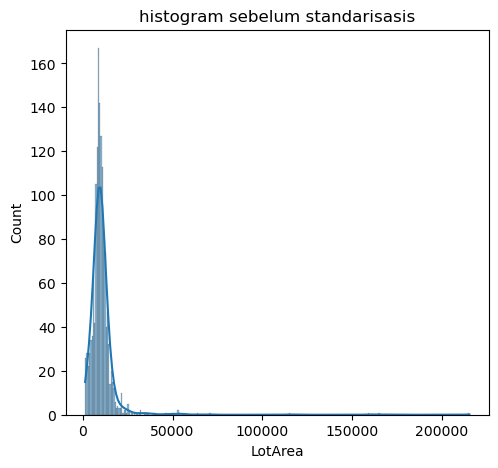

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(
    train[numeric_feature[3]],
    kde=True,
)
plt.title(f"histogram sebelum standarisasis")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

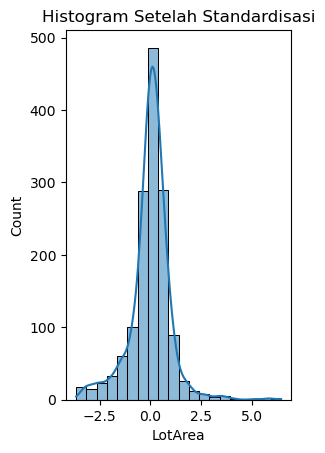

In [25]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_feature[3]], kde=True, bins=20)
plt.title("Histogram Setelah Standardisasi")

### Menangani Duplikasi Data

In [26]:
duplicate = df.duplicated()

print("baris duplikat: ")
print(df[duplicate])

baris duplikat: 
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


In [27]:
# Menghapus baris duplikat
df = df.drop_duplicates()
 
print("DataFrame setelah menghapus duplikat:")
print(df)

DataFrame setelah menghapus duplikat:
            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -2.161263    0.493460    -0.146062 -0.141171     0.667499    -0.477387   
1    -2.149711   -1.164269     0.546852  0.105609    -0.042192     2.011352   
2    -2.139242    0.493460    -0.000631  0.413721     0.667499    -0.477387   
3    -2.129513    0.698191    -0.397299  0.095490     0.667499    -0.477387   
4    -2.120335    0.493460     0.718695  0.877127     1.350924    -0.477387   
...        ...         ...          ...       ...          ...          ...   
1455  1.548650    0.493460    -0.295410 -0.266808    -0.042192    -0.477387   
1456  1.550477   -1.164269     0.760913  0.722071    -0.042192     0.440551   
1457  1.552303    0.698191    -0.097163 -0.010330     0.667499     2.698415   
1458  1.554129   -1.164269    -0.000631  0.129088    -0.783171     0.440551   
1459  1.555954   -1.164269     0.324920  0.172505    -0.783171     0.440551   

      YearBui

### Mengonversi Tipe Data

Sebagian besar algoritma machine learning didasarkan pada operasi matematika yang melibatkan perhitungan jarak, gradien, atau distribusi data. Misalnya, regresi linier menghitung persamaan garis menggunakan koefisien yang diterapkan pada fitur numerik. Jika data inputan berupa kategori (seperti "merah," "biru," "hijau"), tidak ada cara langsung untuk memasukkan nilai kategori tersebut ke dalam perhitungan matematika.

Di lain sisi, kategori seperti "merah," "biru," dan "hijau" tidak memiliki urutan atau nilai numerik inheren yang dapat dimengerti oleh model. Jika kategori diberi label numerik (misalnya, "merah" = 1, "biru" = 2, "hijau" = 3), model dapat salah menganggap bahwa ada hubungan matematis di antara kategori tersebut, seperti "biru" menjadi dua kali "merah" yang menghasilkan kesalahan persepsi sehingga mengakibatkan model tidak berjalan sesuai dengan harapan.

Banyak algoritma, terutama yang berbasis jarak (seperti KNN), memerlukan cara untuk mengukur jarak antar titik data. Oleh karena itu jika data bertipe kategori menyebabkan model tidak dapat mengukur jarak, misalnya, tidak ada jarak matematis yang berarti antara "merah" dan "biru."

1. One-Hot Encoding: mengubah setiap kategori menjadi kolom biner terpisah dengan nilai 0 atau 1 (bisa juga True atau False).

2. Label Encoding: memberikan label numerik untuk setiap kategori, meskipun ini hanya cocok untuk data kategorikal ordinal.

3. Ordinal Encoding: mengonversi kategori yang memiliki urutan menjadi nilai numerik yang mencerminkan urutan tersebut.

In [28]:
category_features = df.select_dtypes(include=["object"]).columns
df[category_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Kita akan menggunakan metode one hot encoding dan label encoding karena data kategorikal yang ada pada dataset ini tidak memiliki urutan. Mari kita lakukan kedua pendekatan tersebut agar semakin terbayang perbedaannya.

#### One Hot Encoding
Penggunaan one hot encoding sangatlah mudah terutama ketika Anda telah memisahkan nama kolom untuk data kategorikal. Perhatikan kode berikut.

In [29]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-2.161263,0.493460,-0.146062,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,...,False,False,False,True,False,False,False,False,True,False
1,-2.149711,-1.164269,0.546852,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,...,False,False,False,True,False,False,False,False,True,False
2,-2.139242,0.493460,-0.000631,0.413721,0.667499,-0.477387,1.055357,0.835594,1.193873,0.571325,...,False,False,False,True,False,False,False,False,True,False
3,-2.129513,0.698191,-0.397299,0.095490,0.667499,-0.477387,-1.629540,-0.863478,-0.818452,0.142272,...,False,False,False,True,True,False,False,False,False,False
4,-2.120335,0.493460,0.718695,0.877127,1.350924,-0.477387,1.007861,0.694898,1.333038,0.750541,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.548650,0.493460,-0.295410,-0.266808,-0.042192,-0.477387,0.960863,0.694898,-0.818452,-1.353159,...,False,False,False,True,False,False,False,False,True,False
1456,1.550477,-1.164269,0.760913,0.722071,-0.042192,0.440551,0.080711,-0.041619,1.130602,0.869532,...,False,False,False,True,False,False,False,False,True,False
1457,1.552303,0.698191,-0.097163,-0.010330,0.667499,2.698415,-1.061347,1.134227,-0.818452,0.261742,...,False,False,False,True,False,False,False,False,True,False
1458,1.554129,-1.164269,-0.000631,0.129088,-0.783171,0.440551,-0.823991,0.429676,-0.818452,-0.460226,...,False,False,False,True,False,False,False,False,True,False


#### Label Encoding
Berbeda dengan one hot encoding, label encoding membutuhkan sebuah library lainnya untuk mempermudah proses pengerjaannya. Pada kasus ini, Anda akan menggunakan LabelEncoder dari sklearn sebagai senjata utama untuk melakukan encoding. Perhatikan kode berikut.

In [30]:
from sklearn.preprocessing import LabelEncoder

# init laber encoder
label_encoder = LabelEncoder()

df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df_lencoder[col])

df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-2.161263,0.493460,-0.146062,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,...,2,6,2,1,1,4,4,2,8,4
1,-2.149711,-1.164269,0.546852,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,...,3,6,4,1,1,4,4,2,8,4
2,-2.139242,0.493460,-0.000631,0.413721,0.667499,-0.477387,1.055357,0.835594,1.193873,0.571325,...,2,6,4,1,1,4,4,2,8,4
3,-2.129513,0.698191,-0.397299,0.095490,0.667499,-0.477387,-1.629540,-0.863478,-0.818452,0.142272,...,2,6,2,5,2,4,4,2,8,0
4,-2.120335,0.493460,0.718695,0.877127,1.350924,-0.477387,1.007861,0.694898,1.333038,0.750541,...,2,6,4,1,1,4,4,2,8,4


### Kekurangan dan kelebihan One Hot Encoding

Kelebihan :

1. One-hot encoding tidak mengasumsikan adanya urutan atau hierarki di antara kategori, yang sangat cocok untuk data kategorikal nominal (misalnya, warna, jenis kelamin, dll.).
2. Karena setiap kategori diubah menjadi kolom terpisah dengan nilai biner (0 atau 1), tidak ada risiko bahwa model akan memperlakukan satu kategori sebagai lebih besar atau lebih kecil daripada yang lain.
3. Model yang sensitif terhadap skala numerik, seperti regresi linier, cenderung berfungsi lebih baik dengan one-hot encoding karena tidak ada hubungan numerik yang diciptakan antara kategori.

Kekurangan :

1. One-hot encoding dapat menghasilkan DataFrame dengan dimensi yang sangat tinggi jika ada banyak kategori. Hal ini bisa menyebabkan masalah "curse of dimensionality," yang membuat model lebih lambat dan memerlukan lebih banyak memori.
2. Hasil one-hot encoding sering kali menjadi sparse matrix, di mana sebagian besar nilainya adalah 0 atau False sehingga bisa memperlambat proses pelatihan.
3. Untuk fitur yang memiliki ribuan kategori (misalnya, kode pos), one-hot encoding bisa menjadi tidak praktis karena akan menghasilkan ribuan kolom baru.

### Kekurangan dan kelebihan Label Encoding

Kelebihan :

1. Label encoding mudah diimplementasikan dan tidak menambah dimensi dataset karena setiap kategori diubah menjadi angka tunggal.
2. Tidak seperti one-hot encoding, label encoding tidak meningkatkan jumlah kolom dalam dataset, yang membuatnya lebih hemat memori dan lebih cepat untuk diproses.
3. Label encoding cocok untuk data kategorikal ordinal di mana ada urutan yang jelas antara kategori (misalnya, rendah, sedang, tinggi).

Kekurangan :

1. Label encoding mengasumsikan bahwa ada urutan atau hierarki antara kategori, yang tidak selalu sesuai dengan kenyataan untuk data nominal. Ini bisa menyebabkan model membuat kesimpulan yang salah karena satu kategori mungkin dianggap lebih besar atau lebih kecil dari yang lain.
2. Jika digunakan pada data kategorikal nominal, label encoding dapat memperkenalkan bias ke dalam model karena model dapat salah menganggap bahwa ada hubungan numerik antara kategori yang sebenarnya setara.
3. Label encoding kurang cocok untuk fitur dengan banyak kategori karena model bisa saja memberi terlalu banyak bobot pada satu kategori yang secara numerik lebih besar daripada yang lain.

### Exploratory dan Explanatory Data Analysis 

In [31]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-2.161263,0.493460,-0.146062,-0.141171,0.667499,-0.477387,1.151867,0.908055,1.230708,0.797537,...,2,6,2,1,1,4,4,2,8,4
1,-2.149711,-1.164269,0.546852,0.105609,-0.042192,2.011352,0.006695,-0.621670,-0.818452,1.011471,...,3,6,4,1,1,4,4,2,8,4
2,-2.139242,0.493460,-0.000631,0.413721,0.667499,-0.477387,1.055357,0.835594,1.193873,0.571325,...,2,6,4,1,1,4,4,2,8,4
3,-2.129513,0.698191,-0.397299,0.095490,0.667499,-0.477387,-1.629540,-0.863478,-0.818452,0.142272,...,2,6,2,5,2,4,4,2,8,0
4,-2.120335,0.493460,0.718695,0.877127,1.350924,-0.477387,1.007861,0.694898,1.333038,0.750541,...,2,6,4,1,1,4,4,2,8,4


In [32]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
 
missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


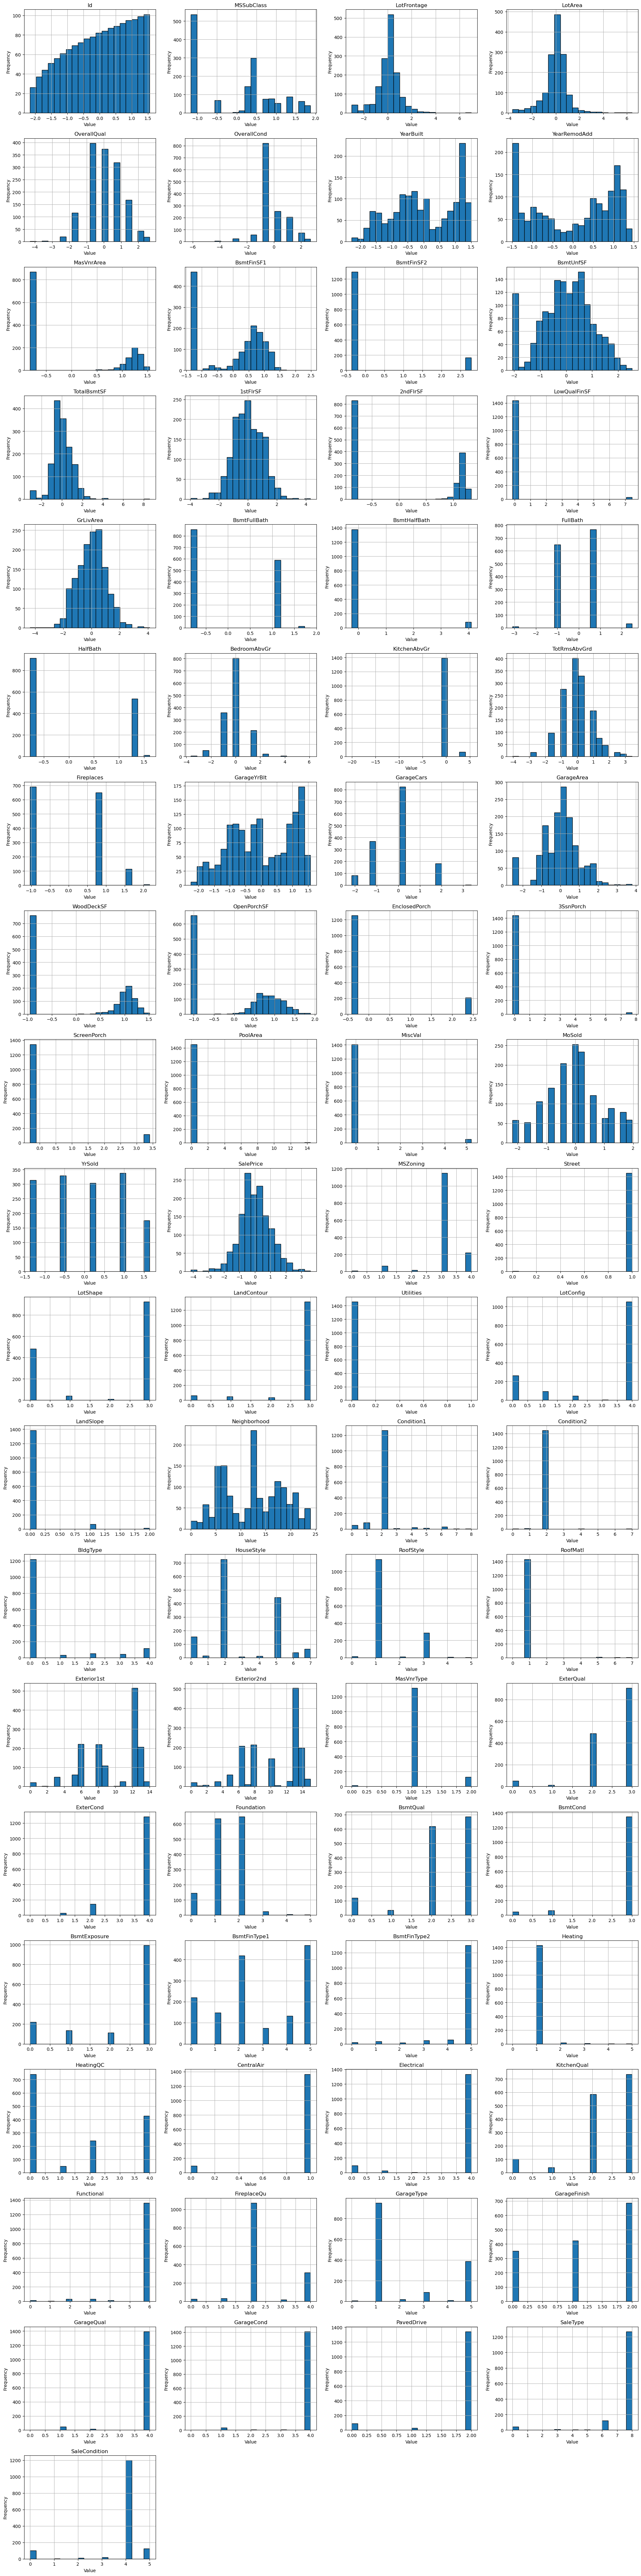

In [33]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

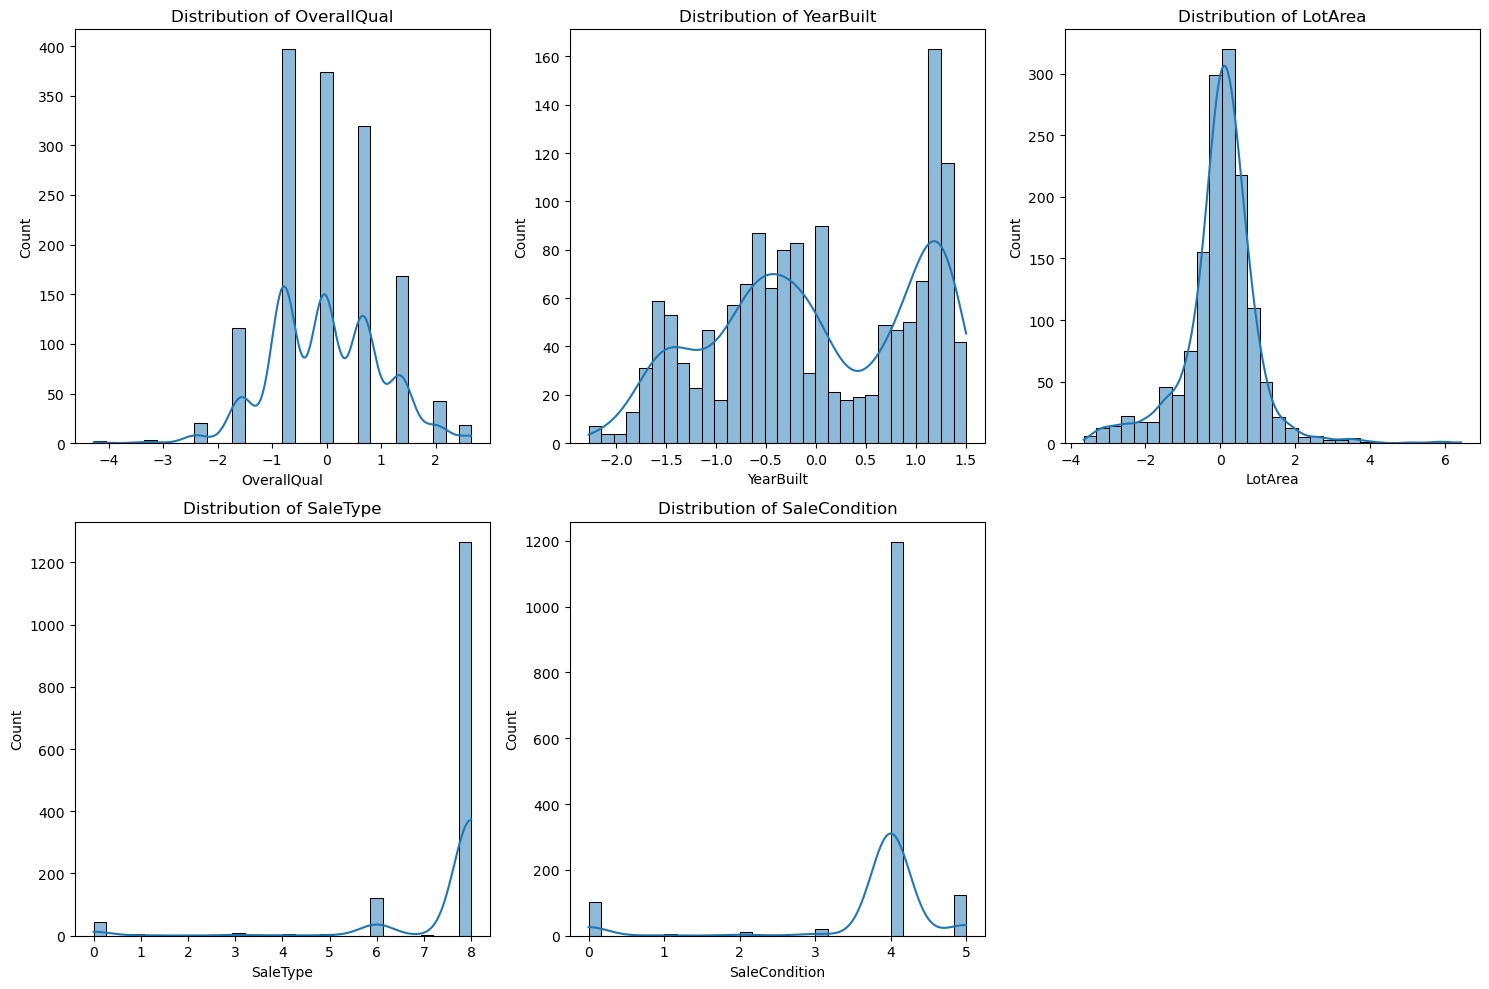

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']
 
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

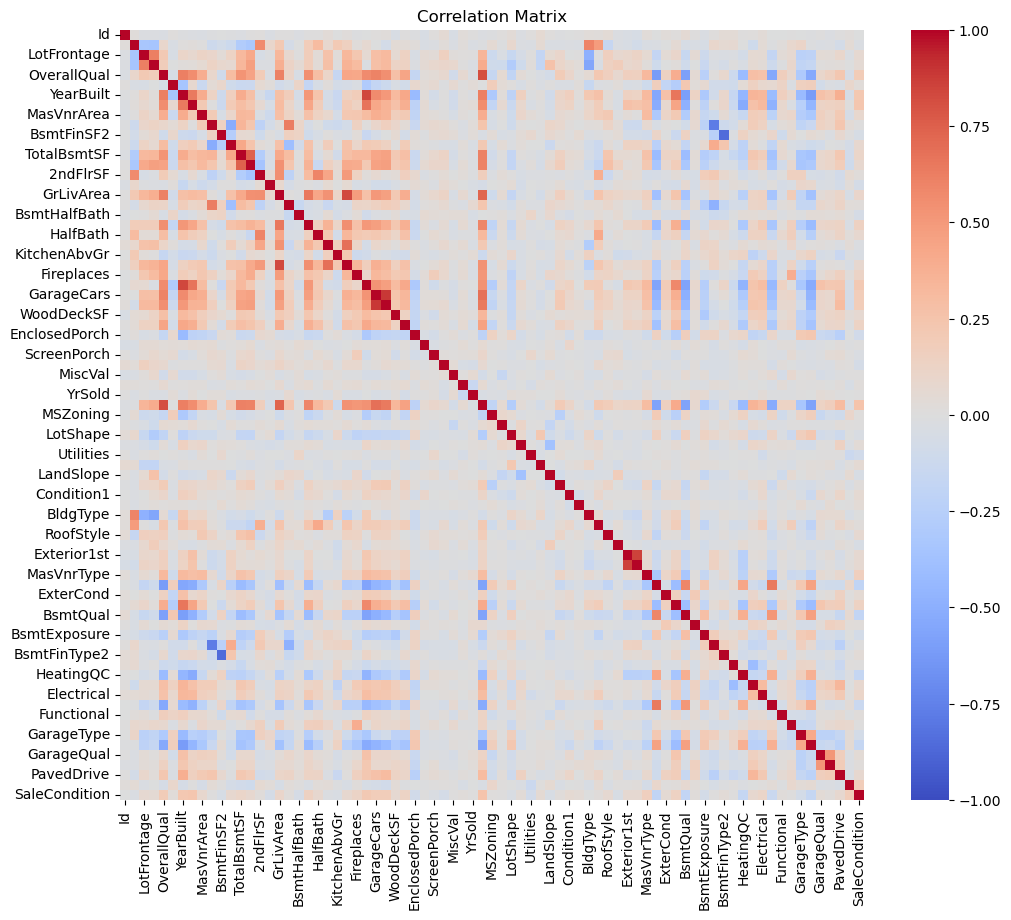

In [35]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

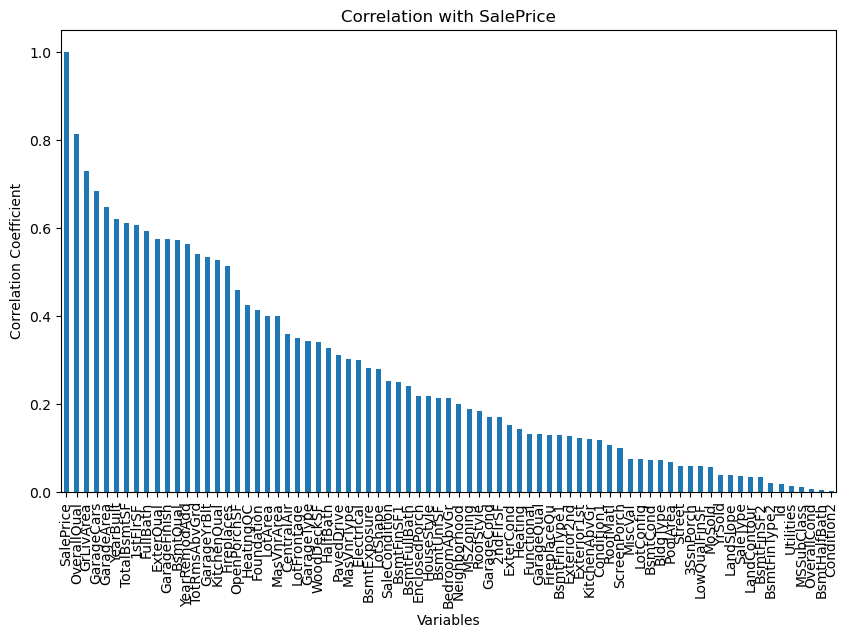

In [36]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

### Data Splitting

Lalu, mengapa data splitting itu penting? Walaupun terlihat sederhana, data splitting setidaknya memiliki peran untuk menghindari overfitting, menyediakan evaluasi yang akurat, dan memberikan validasi yang adil. Selain dari ketiga peran tersebut sebenarnya masih banyak hal yang membuat data splitting itu penting, tetapi pada kesempatan kali ini mari kita jabarkan terlebih dahulu ketiga peran tersebut sebagai dasar pengetahuan.

1. Menghindari Overfitting:
Tanpa data splitting, model machine learning mungkin belajar terlalu banyak dari data pelatihan, termasuk noise dan outliers, sehingga kinerjanya menurun pada data baru. Data splitting membantu menguji generalisasi model pada data yang belum pernah dilihat oleh model pada proses pelatihan.

2. Menyediakan Evaluasi yang Akurat:
Dengan memisahkan data untuk pelatihan, validasi, dan pengujian kita bisa mengevaluasi kinerja model secara lebih akurat. Proses ini dapat membantu dalam memilih model terbaik dan mengatur hyperparameter dengan lebih baik.

3. Validasi yang Adil:
Data splitting memungkinkan kita untuk melakukan validasi model secara adil dengan menggunakan bagian dari data yang tidak dilibatkan dalam proses pelatihan untuk mengukur kinerja model.

![Gambar Test Split](https://assets.cdn.dicoding.com/original/academy/dos-efbc6f25002a5db22e136a1806330d6c20241015125144.jpeg)

Jika Anda lebih condong ke salah satu kubu di atas, tenang saja kita tetap akan mempelajari hal yang sama mengenai jenis data setelah dilakukan splitting.

#### __Training Set__

Deskripsi: subset data yang digunakan untuk melatih model. Model belajar pola dari data ini dan menyesuaikan parameternya.
Persentase Umum: biasanya 60-80% dari total dataset.


#### __Validation Set__

Deskripsi: subset data yang digunakan untuk melakukan validasi selama proses pelatihan. Ini digunakan untuk tuning hyperparameter dan memilih model terbaik. Model tidak melihat data ini selama pelatihan.
Persentase Umum: biasanya 10-20% dari total dataset.


#### __Test Set__

Deskripsi: subset data yang digunakan untuk melakukan pengujian akhir setelah model selesai dilatih dan di-tuning. Ini memberikan estimasi kinerja model pada data baru.
Persentase Umum: biasanya 10-20% dari total dataset.

Terdapat beberapa teknik yang umum dilakukan pada tahap data splitting, perhatikan tabel berikut.

| **Metode**                  | **Deskripsi**                                                                                                                                              | **Kelebihan**                                                                                        | **Kekurangan**                                                                                |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **Holdout Method**          | Membagi dataset menjadi dua atau tiga bagian: training set, validation set, dan test set. Metode paling sederhana dan umum digunakan.                      | Mudah diimplementasikan dan cepat.                                                                   | Jika dataset kecil, pembagian data mungkin tidak mewakili distribusi data secara keseluruhan. |
| **K-Fold Cross Validation** | Membagi dataset menjadi *k* subset (*folds*). Model dilatih *k* kali, setiap kali menggunakan satu fold sebagai test set dan *k-1* sebagai training set.   | Memberikan evaluasi lebih robust, mengurangi bias karena setiap data digunakan untuk train dan test. | Lebih lambat karena model harus dilatih *k* kali.                                             |
| **Stratified Splitting**    | Membagi data sehingga proporsi kelas dalam training, validation, dan test set tetap sama dengan dataset asli. Sangat penting untuk dataset tidak seimbang. | Menghindari bias dalam prediksi pada kelas minoritas.                                                | Lebih kompleks daripada holdout biasa.                                                        |
| **Time Series Splitting**   | Untuk data time series, data dibagi berdasarkan waktu. Data lama untuk pelatihan, data terbaru untuk pengujian.                                            | Cocok untuk data time series yang membutuhkan urutan kronologis.                                     | Tidak dapat digunakan untuk data non-time series.                                             |


Setelah mengetahui teknik-teknik untuk melakukan splitting tentunya Anda sudah tidak sabar untuk melangkah lebih jauh ‘kan? Sabar dahulu karena untuk melangkah lebih jauh, Anda perlu mempertimbangkan beberapa hal seperti berikut untuk menghasilkan pembagian yang optimal.

* **Imbalance Data**

  * Jika dataset memiliki distribusi kelas yang tidak seimbang, teknik seperti **stratified splitting** sangat penting.
  * Tujuannya untuk memastikan bahwa model tidak bias terhadap kelas mayoritas.

* **Data Leakage**

  * Terjadi ketika informasi dari luar set pelatihan *bocor* ke dalam proses pelatihan.
  * Akibatnya, kinerja model di test set terlihat lebih baik daripada yang sebenarnya.
  * Splitting yang benar membantu menghindari masalah ini.

* **Randomness**

  * Randomness dalam proses splitting penting untuk memastikan pembagian data tidak bias.
  * Untuk eksperimen yang dapat direproduksi, sangat penting menetapkan `random_state` yang tetap.


In [37]:
from sklearn.model_selection import train_test_split

X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# menghitung panjang/jumlah data 
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(X_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(X_test))

Jumlah data:  1460
Jumlah data latih:  1168
Jumlah data test:  292


### Pembangunan Model (Modelling)

In [43]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(X_train, y_train)
 
# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train, y_train)
 
# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=184)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=184)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Evaluasi pada model LARS
pred_lars = lars.predict(X_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.833996,1.155203,0.016324


In [41]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(X_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.833996,1.155203,0.016324
Linear Regression,0.245191,0.131368,0.888137


In [42]:
# Evaluasi pada model Linear Regression
pred_GBR = GBR.predict(X_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.833996,1.155203,0.016324
Linear Regression,0.245191,0.131368,0.888137
GradientBoostingRegressor,0.236331,0.123354,0.894962


In [44]:
# Evaluasi pada model Linear Regression
pred_RF = RF.predict(X_test)
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF = mean_squared_error(y_test, pred_RF)
r2_RF = r2_score(y_test, pred_RF)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['RandomForestRegressor'] = [mae_RF, mse_RF, r2_RF]
df_results

,MAE,MSE,R2
Lars,0.833996,1.155203,0.016324
Linear Regression,0.245191,0.131368,0.888137
GradientBoostingRegressor,0.236331,0.123354,0.894962
RandomForestRegressor,0.245229,0.142753,0.878443



Sampai di sini, mudah ‘kan? Seperti yang dapat Anda lihat dari beberapa kode di atas memiliki struktur yang sama, yaitu .predict() dan beberapa metriks evaluasi seperti MAE, MSE, dan R2. Mari kita pelajari apa fungsi dari masing-masing function tersebut.
* **.predict()**

  * Digunakan pada model scikit-learn untuk membuat prediksi setelah model dilatih dengan `.fit()`.
  * Menghasilkan nilai prediksi pada data baru atau data testing.

* **mean\_absolute\_error (MAE)**

  * Mengukur rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual.
  * Intuitif karena langsung menunjukkan seberapa jauh prediksi dari nilai sebenarnya.
  * Tidak memperhitungkan arah kesalahan (positif atau negatif).

* **mean\_squared\_error (MSE)**

  * Mengukur rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai aktual.
  * Memberikan penalti lebih besar untuk kesalahan yang lebih besar.
  * Lebih sensitif terhadap outlier dibanding MAE.

* **r2\_score (R²)**

  * Mengukur proporsi varians target yang bisa dijelaskan oleh fitur dalam model.
  * Menunjukkan seberapa baik nilai prediksi mendekati nilai aktual.
  * Nilai R² = 1 → prediksi sempurna, Nilai R² ≤ 0 → model tidak lebih baik dari baseline.

Mau saya tambahkan contoh kecil pakai angka biar lebih mudah kebayang perbedaan MAE vs MSE vs R²?


### Menyimpan Model

1. Joblib adalah pilihan yang disarankan untuk menyimpan model scikit-learn karena lebih efisien dalam menyimpan objek model yang besar.

In [45]:
import joblib

joblib.dump(GBR, "gbr_model.joblib")

['gbr_model.joblib']

2. Pickle adalah modul standar Python yang dapat digunakan untuk menyimpan hampir semua objek Python termasuk model machine learning.

In [46]:
import pickle

with open("gbr_model.pkl", "wb") as file:
    pickle.dump(GBR, file)